# **ML Course 2024 |  Medical Expenses Prediction Challenge**

This notebook should serve as a starting point to work on the project. Please read the project description first.

In [510]:
# Just so that you don't have to restart the notebook with every change.
%load_ext autoreload
%autoreload 2 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# **Introduction**

## Set team ID
Important: set your Team ID here. You can find it in CMS.

In [511]:
team_id = "18"  # Our team ID

## [Colab only] Connect to your Google Drive

In [512]:
# from google.colab import drive
# drive.mount('/content/drive')

In [513]:
# %cd "/content/drive/MyDrive/path/to/your/project"

# **Imports**

[Colab only] Note: if you need to install any packages, run a code cell with content `!pip install packagename`

In [514]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.metrics as skm
from prettytable import PrettyTable
from sklearn import linear_model, preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from models.model import DataPreprocessor

# **Data Analysis & Preprocessing**

## Load Data

In a first step, we load the provided training data from the csv file

In [515]:
df_train = pd.read_csv('data/train.csv')
print("The loaded dataset has {} rows and {} columns".format(df_train.shape[0], df_train.shape[1]))

The loaded dataset has 15000 rows and 110 columns


In [516]:
df_train.head()

,RACE,SEX,PANEL,WEIGHT,STUDENT_STAT,MIL_ACTIV_DUTY,HON_DISCHARGE,HEALTH_STAT,MENTAL_HLTH,CHRON_BRONCH,...,NUM_PRESCR_MEDS,DIFFIC_HEAR,DIFFIC_SEE,SMOK,OVR_FEEL_14,MENTAL_HLTH_SCR,PHY_HLTH_SCR,OVR_FEEL_30,TOT_MED_EXP,UTILIZATION
0,Non-White,1,19,7205.036720,-1,2,2,2,2,2,...,0,2,2,2,1,43.82,61.41,3,0,LOW
1,White,1,20,5501.113581,-1,4,2,1,1,2,...,12,2,2,2,0,60.12,54.80,0,240,LOW
2,White,1,20,16797.708379,-1,4,1,3,1,2,...,20,2,2,2,0,60.35,30.08,0,791,LOW
3,Non-White,2,19,3605.218411,-1,2,2,3,3,2,...,20,2,2,2,0,58.32,50.22,0,272,LOW
4,Non-White,1,19,11223.127404,1,2,2,1,2,2,...,3,2,2,2,0,62.39,56.71,0,1264,LOW


## Data exploration

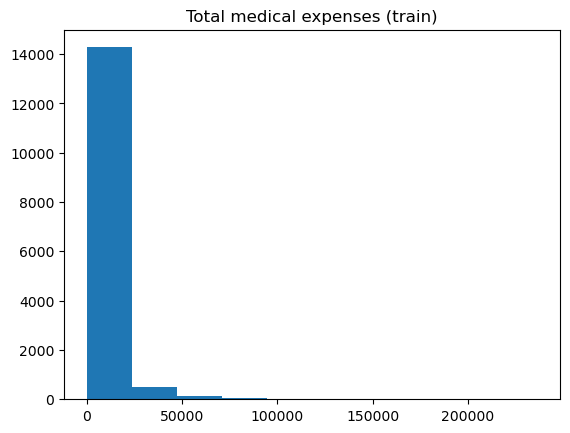

In [517]:
# TODO: explore the data thoroughly, i.e. look for missing values, plot feature histograms, etc

# This is a (rather bad) plot to get you started:
plt.hist(df_train['TOT_MED_EXP'])
plt.title("Total medical expenses (train)")
plt.show()

In [518]:
# [ ] TODO: Check Outliers

In [519]:
# [ ] TODO: Check Normal Distribution

## **Data Preprocessing**

In [520]:
data_preprocessor = DataPreprocessor(df_train)

In [521]:
data_preprocessor.check_missing_values()

No missing values found in the dataset.


In [522]:
data_preprocessor.describe()

Original Dataset:
	Categorical Columns and Unique Values:
	+-------------+-----------------------+
	| Column Name |     Unique Values     |
	+-------------+-----------------------+
	|     RACE    | ['Non-White' 'White'] |
	| UTILIZATION |     ['LOW' 'HIGH']    |
	+-------------+-----------------------+
	Statistics for Numerical Columns:
	+----------------------+-----------+--------------------+--------+-----------+-----------+-----------+------------+
	|     Column Name      |    Mean   | Standard Deviation |  Min   |    25%    |    50%    |    75%    |    Max     |
	+----------------------+-----------+--------------------+--------+-----------+-----------+-----------+------------+
	|         SEX          |   1.533   |       0.499        | 1.000  |   1.000   |   2.000   |   2.000   |   2.000    |
	|        PANEL         |   19.533  |       0.499        | 19.000 |   19.000  |   20.000  |   20.000  |   20.000   |
	|        WEIGHT        |  9670.900 |      8555.467      | 0.000  |  3956.82

In [523]:
data_preprocessor.run(target="TOT_MED_EXP")

2024-06-10 00:54:47,350 - root - INFO - Encoding categorical columns ['RACE', 'UTILIZATION'] using one-hot encoding.
2024-06-10 00:54:47,358 - root - INFO - Fitting a new StandardScaler() using the dataset. Omitting ['TOT_MED_EXP'].


,SEX,PANEL,WEIGHT,STUDENT_STAT,MIL_ACTIV_DUTY,HON_DISCHARGE,HEALTH_STAT,MENTAL_HLTH,CHRON_BRONCH,JNT_PAIN,...,DIFFIC_HEAR,DIFFIC_SEE,SMOK,OVR_FEEL_14,MENTAL_HLTH_SCR,PHY_HLTH_SCR,OVR_FEEL_30,TOT_MED_EXP,RACE_White,UTILIZATION_LOW
0,-1.067614,-1.067900,-0.288230,-0.333873,-0.552841,0.143883,-0.340287,-0.095873,0.084836,0.492377,...,0.195421,0.169159,0.438481,0.423032,0.019541,0.961263,0.208804,0,False,True
1,-1.067614,0.936417,-0.487399,-0.333873,1.752903,0.143883,-1.239567,-1.035189,0.084836,0.492377,...,0.195421,0.169159,0.438481,-0.130337,0.781525,0.645649,-0.453785,240,True,True
2,-1.067614,0.936417,0.833040,-0.333873,1.752903,-1.204180,0.558992,-1.035189,0.084836,0.492377,...,0.195421,0.169159,0.438481,-0.130337,0.792276,-0.534683,-0.453785,791,True,True
3,0.936668,-1.067900,-0.709007,-0.333873,-0.552841,0.143883,0.558992,0.843443,0.084836,-0.862788,...,0.195421,0.169159,0.438481,-0.130337,0.697379,0.426963,-0.453785,272,False,True
4,-1.067614,-1.067900,0.181437,1.623563,-0.552841,0.143883,-1.239567,-0.095873,0.084836,-0.862788,...,0.195421,0.169159,0.438481,-0.130337,0.887641,0.736848,-0.453785,1264,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,-1.067614,-1.067900,1.140611,-0.333873,-0.552841,0.143883,-0.340287,-0.095873,0.084836,0.492377,...,0.195421,0.169159,0.438481,-0.130337,0.689432,0.555405,-0.453785,0,False,True
14996,0.936668,-1.067900,-0.802104,-0.333873,-0.552841,0.143883,1.458272,0.843443,0.084836,0.492377,...,0.195421,0.169159,0.438481,-5.110656,0.789472,0.517207,-2.441552,4,False,True
14997,0.936668,0.936417,0.299958,-0.333873,-0.552841,0.143883,-0.340287,0.843443,0.084836,0.492377,...,0.195421,0.169159,0.438481,1.529770,-0.993945,1.233427,1.754844,0,False,True
14998,0.936668,0.936417,-0.502642,-0.333873,-0.552841,0.143883,0.558992,0.843443,0.084836,-0.862788,...,0.195421,0.169159,-1.302598,-0.683706,-2.075681,-2.018691,-0.674648,600,False,True


In [524]:
data_preprocessor.describe()

Original Dataset:
	Categorical Columns and Unique Values:
	+-------------+-----------------------+
	| Column Name |     Unique Values     |
	+-------------+-----------------------+
	|     RACE    | ['Non-White' 'White'] |
	| UTILIZATION |     ['LOW' 'HIGH']    |
	+-------------+-----------------------+
	Statistics for Numerical Columns:
	+----------------------+-----------+--------------------+--------+-----------+-----------+-----------+------------+
	|     Column Name      |    Mean   | Standard Deviation |  Min   |    25%    |    50%    |    75%    |    Max     |
	+----------------------+-----------+--------------------+--------+-----------+-----------+-----------+------------+
	|         SEX          |   1.533   |       0.499        | 1.000  |   1.000   |   2.000   |   2.000   |   2.000    |
	|        PANEL         |   19.533  |       0.499        | 19.000 |   19.000  |   20.000  |   20.000  |   20.000   |
	|        WEIGHT        |  9670.900 |      8555.467      | 0.000  |  3956.82

# Linear regression

In this part, we will solve an linear regression task to predict our target `TOT_MED_EXP`, i.e. total medical expences, using the other features.


In its simplest form, predictions of a linear regression model can be summarized as

$$
\hat{y} = \mathbf{w}^T \mathbf{x} = f(\mathbf{x},\mathbf{w})
$$

which can be optimized using the cost function

$$
\mathbf{w}^{*}=\underset{\mathbf{w}}{\arg \min } \frac{1}{n} \sum_{i=1}^{n}\left(y_{i}-f\left(\mathbf{x}_{i}, \mathbf{w}\right)\right)^{2}
$$

### Process the data

In [525]:
X, y = data_preprocessor.get_regression_X_y(target="TOT_MED_EXP", drop=["UTILIZATION_LOW"])
print("Labels have shape {}".format(y.shape), "features have shape {}".format(X.shape))

# Split X and y for training and validation purposes
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Labels have shape (15000,) features have shape (15000, 108)


### Train a linear regression model

In [526]:

reg = LinearRegression().fit(X_train, y_train)

### Evaluate the linear regression model

In [527]:


datasets = {
    "training data": [X_train, y_train],
    "validation data": [X_val, y_val]
}

for split_name, dataset in datasets.items():
    print(f'Split: {split_name}\n')

    X_i, y_i = dataset
    y_pred = reg.predict(X_i)

    rmse = np.sqrt(skm.mean_squared_error(y_i, y_pred))
    print(f"\tRMSE: {rmse:.2f}")

    mae = skm.mean_absolute_error(y_i, y_pred)
    print(f"\tMAE: {mae:.2f}")

    # These might also be helpful to look at. Think about why!
    print("\tsqrt(median((y-pred)**2)):",np.sqrt(np.median((y_i-y_pred)**2)))
    print("\tmedian(abs(y-pred)):",np.median(abs(y_i-y_pred)))

    print('\n\n')

Split: training data

	RMSE: 10662.90
	MAE: 4538.97
	sqrt(median((y-pred)**2)): 2038.5248992870336
	median(abs(y-pred)): 2038.524835021809



Split: validation data

	RMSE: 11131.17
	MAE: 4822.95
	sqrt(median((y-pred)**2)): 2055.7894552299617
	median(abs(y-pred)): 2055.7894059796736





### Export test set predictions for regression task

At this point, we can use our model to predict the medical expenses from the test sets. The following cell shows an example on how to do this.

You must save your predictions (`y_hat`) to a file and name the file in the following format:

`<TEAM_ID>__<SPLIT>__reg_pred.npy`

Make sure that:

`<TEAM_ID>` is your team id as given in CMS.

`<SPLIT>` is "test_public" during the semester and "test_private" for the final submission. We will write an announcement to CMS once the test_private dataset is available to download.

In [528]:
# Run this to save a file with your predictions on the test set to be submitted
split = 'test_public' # replace by 'test_private' for FINAL submission

df_test =  pd.read_csv(f'data/{split}.csv')

df_test = data_preprocessor.run(on=df_test, target="TOT_MED_EXP")

print(data_preprocessor)

y_hat = reg.predict(df_test)

# Save the results with the format <TEAM_ID>__<SPLIT>__reg_pred.npy

folder = './results'
np.save(os.path.join(folder, f'{team_id}__{split}__reg_pred.npy'), y_hat) # Note the double underscores '__' in the filename

2024-06-10 00:54:48,147 - root - INFO - Encoding categorical columns ['RACE', 'UTILIZATION'] using one-hot encoding.
2024-06-10 00:54:48,147 - root - WARNING - Categorical column 'UTILIZATION' not found in the dataset. Omitting one-hot encoding.
2024-06-10 00:54:48,151 - root - INFO - Using the existing StandardScaler(). Omitting ['TOT_MED_EXP'].
Original Dataset:
	Categorical Columns and Unique Values:
	+-------------+-----------------------+
	| Column Name |     Unique Values     |
	+-------------+-----------------------+
	|     RACE    | ['White' 'Non-White'] |
	+-------------+-----------------------+
	Statistics for Numerical Columns:
	+----------------------+-----------+--------------------+--------+-----------+-----------+-----------+------------+
	|     Column Name      |    Mean   | Standard Deviation |  Min   |    25%    |    50%    |    75%    |    Max     |
	+----------------------+-----------+--------------------+--------+-----------+-----------+-----------+------------+
	|

# **Linear classification**

In this part, we will train a simple linear classification model to predict our target `UTILIZATION`.


We will first change our targets (classes: LOW, HIGH) to numeric targets. Then, we solve a logistic regression problem by minimizing the binary cross-entropy function

$$
J(\theta) = -\frac{1}{n} \sum_{i=1}^{n} \left( y_i \log(p_{\theta}(\hat{y}=1 | \mathbf{x}_i)) + (1 - y_i) \log(p_{\theta}(\hat{y}=0 | \mathbf{x}_i)) \right)
$$

where $y_i \in \{0, 1\}$ and $p_{\theta}(\hat{y}=k | \mathbf{x}_i)$ is the probability assigned by our model to class $k$ having observed features $\mathbf{x}_i$.

0 refers to HIGH, and 1 refers to LOW

### Process the data

In [530]:
df_train =  pd.read_csv(f'data/train.csv')

y = df_train['UTILIZATION']

df_train.drop(columns=['UTILIZATION','TOT_MED_EXP'])

le = preprocessing.LabelEncoder()
df_test['RACE'] = le.fit_transform(df_test['RACE'])

y = le.fit_transform(y) # maps HIGH to 0 and LOW to 1

print(f'Original classes {le.classes_}')
print(f'Corresponding numeric classes {le.transform(le.classes_)}')


print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}", f", unique entries in y: {np.unique(y)}")

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# These hyperparameters are just placeholders, choosen without much care. For a good LogisticRegression baseline, play with them a bit.
clf = linear_model.LogisticRegression(penalty=None,
                                      dual=False,
                                      tol=0.0001,
                                      C=1.0,
                                      fit_intercept=True,
                                      intercept_scaling=1,
                                      class_weight=None, # None, balanced
                                      random_state=None,
                                      solver='lbfgs',
                                      max_iter=1500,
                                      multi_class='auto',
                                      verbose=0,
                                      warm_start=False,
                                      n_jobs=None,
                                      l1_ratio=None
                                     )

KeyError: 'RACE'

### Fit the model by using training data

In [ ]:
clf = clf.fit(X_train, y_train)


/home/camilo/miniconda3/envs/torch/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Now evaluate your model. Check the appendix for details on micro, macro and weighted averaging

In [ ]:
datasets = {
    "training data": [X_train, y_train],
    "validation data": [X_val, y_val]
}

for split_name, dataset in datasets.items():
    X_i, y_i = dataset
    y_pred = clf.predict(X_i)
    print(f'\nSplit: {split_name}')

    print(skm.classification_report(y_i, y_pred))


Split: training data
              precision    recall  f1-score   support

           0       0.73      0.46      0.57      2565
           1       0.87      0.95      0.91      9435

    accuracy                           0.85     12000
   macro avg       0.80      0.71      0.74     12000
weighted avg       0.84      0.85      0.84     12000


Split: validation data
              precision    recall  f1-score   support

           0       0.76      0.47      0.58       647
           1       0.87      0.96      0.91      2353

    accuracy                           0.85      3000
   macro avg       0.82      0.71      0.75      3000
weighted avg       0.85      0.85      0.84      3000



At this point, we can use our model to predict healthcare utilization on the test set.

We again need to follow a specific namim format when saving the predictions. Similarly to before, the name of the file should be `<TEAM_ID>__<SPLIT>__clf_pred.npy`.



In [ ]:
# Run this to save a file with your predictions on the test set to be submitted

split = 'test_public' # replace by 'test_private' for FINAL submission

df_test =  pd.read_csv(f'data/{split}.csv')

# Process data
df_test['RACE'] = LabelEncoder().fit_transform(df_test['RACE'])

y_hat = clf.predict(df_test)

# Save the results with the format <TEAM_ID>__<SPLIT>__clf_pred.npy

folder = './'
np.save(os.path.join(folder, f'{team_id}__{split}__clf_pred.npy'), y_hat)

# **Submission to CMS**

Put your .npy files for both regression and classification tasks in the same zip file. Please name the file as `<TEAM_ID>.zip` (e.g. `123.zip`) and upload it to CMS system. It is essential that the files inside the .zip are named as follow:

`<TEAM_ID>__<SPLIT>__reg_pred.npy` \
`<TEAM_ID>__<SPLIT>__clf_pred.npy`

Above, `<SPLIT>` should correspond to `test_public` for the leaderboard and `test_private` for the final submission.
As long as the `test_private.csv` data file is not released yet, the zip will contain only two files.


### Appendix: Reminders about macro and micro averaging:

When evaluating a classification model using `skm.classification_report(y_i, y_pred)` as done above, we get a macro and a weighted average.

In the context of computing F1-score, "macro" and "micro" averaging are two commonly used techniques to aggregate the per-class F1-scores.

**Micro-average**: Compute the F1-score globally by counting the total true positives, false negatives, and false positives over all classes, and then calculating precision, recall, and F1-score using these aggregated values.

**Macro-average**: Calculate the F1-score for each class separately, and then take the average of these per-class F1-scores.

The main difference between these two techniques is the way they treat class imbalance. Micro-average treats all classes equally, regardless of their size, while macro-average treats each class equally, regardless of the number of samples in that class.

Micro-average is often used when we care about overall performance across all classes, and we want to give more weight to the performance on larger classes. In contrast, macro-average is often used when we want to evaluate the performance on each class separately and give equal weight to each class.


In addition to micro and macro averaging, there is another common technique for computing the F1-score called **weighted averaging**.

**Weighted averaging** is similar to macro averaging in that it computes the per-class F1-score and then takes the average of these scores. However, unlike macro averaging, weighted averaging takes into account the number of samples in each class when computing the average. Specifically, the weighted average is computed as follows:

- Compute the F1-score for each class separately.
- Compute the weight for each class as the number of samples in that class divided by the total number of samples.
- Compute the weighted average of the per-class F1-scores, where each per-class F1-score is weighted by the weight of that class.

The weighted average is commonly used when the dataset is imbalanced, meaning that some classes have many more samples than others. In such cases, using the simple average (macro-average) would give too much weight to the smaller classes, while using micro-average would give too much weight to the larger classes. The weighted average strikes a balance between these two approaches by giving more weight to the classes with more samples while still taking into account the performance of all classes.


When computing the F1 score for the leaderboard and the final challenge results, we will be using the macro averaging strategy.